<a href="https://colab.research.google.com/github/LuisaBeccar/atenciones_md_laboral/blob/main/USABLE_finochietto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# librerias
%%capture
import pandas as pd
import numpy as np
!pip install catboost
!uname
from sklearn.feature_extraction.text import CountVectorizer
#Spacy
!python -m spacy download es_core_news_sm
import spacy
sp = spacy.load('es_core_news_sm')
import matplotlib.pyplot as plt
# counter unipalabras con quitador de stopwords
from spacy.lang.es import stop_words as es_stop_words
counter1 = CountVectorizer(stop_words= list(es_stop_words.STOP_WORDS))



##✅  USABLE

In [3]:
%%capture
# copy paste cada texto de observaciones de cada periodo en su input

dic_ene_24 = input("copie y pegue aqui las observaciones de la planilla 1:")
ene_feb_24 = input("copie y pegue aqui las observaciones de la planilla 2:")
feb_mar_24 = input("copie y pegue aqui las observaciones de la planilla 3:")
mar_abr_24 = input("copie y pegue aqui las observaciones de la planilla 4:")
abr_may_24 = input("copie y pegue aqui las observaciones de la planilla 5:")
may_jun_24 = input("copie y pegue aqui las observaciones de la planilla 6:")
jun_jul_24 = input("copie y pegue aqui las observaciones de la planilla 7:")
jul_ago_24 = input("copie y pegue aqui las observaciones de la planilla 8:")
ago_sept_24 = input("copie y pegue aqui las observaciones de la planilla 9:")
sept_oct_24 = input("copie y pegue aqui las observaciones de la planilla 10:")
oct_nov_24 = input("copie y pegue aqui las observaciones de la planilla 11:")
nov_dic_24 = input("copie y pegue aqui las observaciones de la planilla 12:")
prolongadas_24 = input("copie y pegue aqui las observaciones de la planilla prolongados:")

copie y pegue aqui las observaciones de la planilla 1:acude a consultorio de ml con constancia de atencion 9/12 reposo 24 hs dx mialgias.  02/01 mail con certificado de gastroenteritis, reposo 48hs, se cita a consult a traer el certificado 04/01 envia certif online dx diarrea reposo 24hs 11/01 envia certif 10/01 dx gec reposo 24 hs  13/12 envia mail informando que no se presento a trabajar por sintomas de dolor abdominal + colicos y diarrea, aviso a coordinacion, pendiente que envie certificado. Envia por mail certificado del 12/12 con dx de intoxicacion alimentaria con reposo por 48hs, se toma solo el 13/12 debido a que se atendio luego de su horario de trabajo el dia 12/12 // 9/1 concurre con certificado de intox alimentaria, reposo 48hs 15/01 se recibe certif 14/01 sme gripal secundario a covid +, refiere FIS 13/01, adjunta hnf ag +, aislamiento hasta el 17/01 inclusive  15/01 se recibe mail hnf AG + 15/01, refiere FIS 13/01, aislamiento hasta el 17/01 inclusive  15/12 envia certif 

In [4]:
# diccionario de periodo: texto

periodos = {"ene_feb_24":ene_feb_24,
            "feb_mar_24":feb_mar_24,
            "mar_abr_24":mar_abr_24,
            "abr_may_24":abr_may_24,
            "may_jun_24":may_jun_24,
            "jun_jul_24":jun_jul_24,
            "jul_ago_24":jul_ago_24,
            "ago_sept_24":ago_sept_24,
            "sept_oct_24":sept_oct_24,
            "oct_nov_24":oct_nov_24,
            "nov_dic_24":nov_dic_24,
            "prolongadas_24":prolongadas_24}

In [5]:
# listas para guardar resultados
nombre = []
virt = []
pres = []

# para cada periodo en periodos hacer la magia
for key, periodo in periodos.items():
  if periodo == "":
    continue
  p = 100  # Number of words per row
  words = periodo.split()
  rows = []
  for i in range(0, len(words), p):
     rows.append(' '.join(words[i:i+p]))
  X = pd.Series(rows)
# X es la serie que resulta de esta funcion y que luego pasara a la otra funcion para analizar texto

#----------
  X_t1 = counter1.fit_transform(X)  # counter_ sin nada, para tokenizar individualmente
  data1 = pd.DataFrame(X_t1.toarray().sum(axis=0),
                    index = counter1.get_feature_names_out(),
                    columns=['freq'])

# -----------------------------------
# para contar binomios quiero las stopwords presentes para poder buscar tipo "se presenta", "se recibe", "se comunica"

  counter2 = CountVectorizer(ngram_range = (2,2))  #an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.
  X_t2 = counter2.fit_transform(X)

  data2 = pd.DataFrame(X_t2.toarray().sum(axis=0),
                       index = counter2.get_feature_names_out(),
                       columns = ['freq']).sort_values('freq',ascending=False)


# ------------------

  virtuales = (data2.query('index == "recibo certificado"').sum().iloc[0] +
               data2.query('index == "recibo certificados"').sum().iloc[0] +
               data2.query('index == "recibo certif"').sum().iloc[0] +
               data2.query('index == "recibo email"').sum().iloc[0] +
               data2.query('index == "recibo mail"').sum().iloc[0] +
               data2.query('index == "se recibe"').sum().iloc[0] +
               data2.query('index == "recibo aviso"').sum().iloc[0] +
               data2.query('index == "sector avisa"').sum().iloc[0] +
               data2.query('index == "envia certif"').sum().iloc[0] +
               data2.query('index == "envia certificado"').sum().iloc[0] +
               data2.query('index == "envia certificados"').sum().iloc[0] +
               data2.query('index == "envia constancia"').sum().iloc[0]+
               data2.query('index == "envia mail"').sum().iloc[0]+
               data2.query('index == "envia email"').sum().iloc[0]+
               data2.query('index == "se comunica"').sum().iloc[0] +
               data2.query('index == "sector informa"').sum().iloc[0]  +
               data2.query('index == "me comunico"').sum().iloc[0] +
               data2.query('index == "se comunica"').sum().iloc[0] +
               data1.query('index == "llamo"').sum().iloc[0] +
               data1.query('index == "llama"').sum().iloc[0] +
               data2.query('index == "intento comunicarme"').sum().iloc[0]
              )
# uso data1 sacados los stopwords, mas prolijo para los unipalabra,, pero sin sacarle stopwords (data2) para bipalabras porque necesito el "se"

  presenciales = (data1.query('index == "concurre"').sum().iloc[0] +
                  data1.query('index == "concurrio"').sum().iloc[0] +
                  data1.query('index == "acude"').sum().iloc[0] +
                  data1.query('index == "acudió"').sum().iloc[0] +
                  data2.query('index == "se presenta"').sum().iloc[0]+
                  data2.query('index == "se presentó"').sum().iloc[0]+
                  data1.query('index == "aporta"').sum().iloc[0])

# uso data1 sacados los stopwords, mas prolijo para los unipalabra, pero sin sacarle stopwords (data2) para bipalabras porque necesito el "se"
# Append resultados a listas
  virt.append(virtuales)
  pres.append(presenciales)
  nombre.append(key)

# DataFrame con resultados. para visualizar "tabla", para graficar "tabla0"
  tabla0 = pd.DataFrame({"nombre": nombre,"virtuales": virt,"presenciales": pres}) # para grafico de barras
  tabla = pd.DataFrame({"nombre": nombre,"virtuales": virt,"presenciales": pres}).T
  tabla.columns = tabla.iloc[0]
  tabla = tabla.iloc[1:]

###--- outside the for
display(tabla)


nombre,ene_feb_24,feb_mar_24,mar_abr_24,abr_may_24,may_jun_24,jun_jul_24,jul_ago_24,ago_sept_24,sept_oct_24,oct_nov_24
virtuales,18,70,73,100,89,91,84,76,73,100
presenciales,9,21,26,52,47,31,47,49,23,55


# Grafico

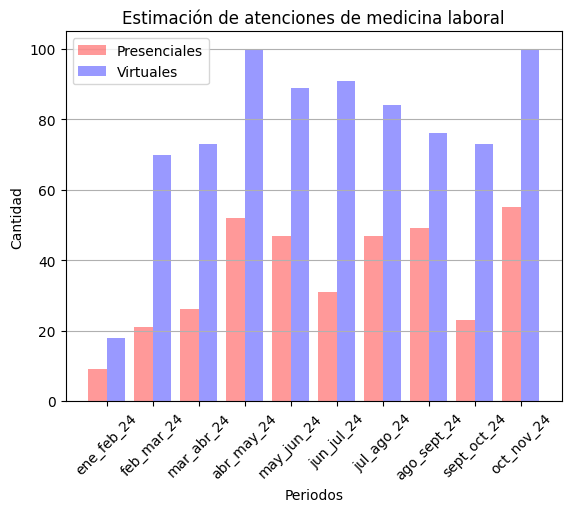

In [35]:
x = range(len(tabla0))  # X-axis positions

# Adjust spacing by modifying the offset for the second bar group
offset = .4  # Increase this value to create more separation between pairs

plt.bar(x, tabla0['presenciales'], width=0.4, color='red', alpha=0.4, label='Presenciales', align='center')
plt.bar([i + offset for i in x], tabla0['virtuales'], width=0.4, color='blue', alpha=0.4, label='Virtuales', align='center')

# Set labels, title, and ticks
plt.xlabel("Periodos")
plt.ylabel("Cantidad")
plt.title("Estimación de atenciones de medicina laboral")

# Adjust tick positions to be in the center of the two bars
plt.xticks([i + .2 for i in x], tabla0['nombre'])  # Center the ticks between the two bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True,axis="y")  # Add a grid for better readability
plt.legend()

plt.show()
